# Continuacion en el gradiente de las LSTM

*
$$ \frac{\partial i_t}{\partial c_{t-1}} $$.
De la clase anterior recordamos que la

$$i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i) = \sigma[ W_i x_t + U_i \tanh(c_{t-1}) \circ o_{t-1} + b_i)] .$$
Si llamamos $z=W_i x_t + U_i h_{t-1} + b_i$, entonces

$$\frac{\partial i_t}{\partial c_{t-1}} = \sigma' (z) U_t \tanh'(c_{t-1}) I \circ o_{t-1}   .$$

*
$$\frac{\partial \tilde{c}_t}{\partial c_{t-1}} .$$
Sabemos que

$$\tilde{c}_t = \tanh(W_c x_t + U_c h_{t-1} + b_c) = \tanh(W_c x_t + U_c \tanh(c_{t-1}) \circ  o_{t-1} + b_c) .$$
De nuevo llamemos $z=W_c + U_c h_{t-1} + b_c$. Entonces

$$\frac{\partial \tilde{c}_t}{\partial c_{t-1}} = \tanh'(z) U_c \tanh'(c_{t-1} .) I \circ o_{t-1}$$

De los cuatro terminos en la ecuacion (2) de la clase 29, el primero domina por que los otros tres tienen numeros en el intervalo $(0,1)$ multiplicados entre si 3 veces.

El termino que domina (asumiendo que los pesos $W,U$ no son muy grandes es:

$I \circ f_t$.
Recuerde que $f_t$ es el "forget cell" y que tambien puede ser pequenho.
Si queremos olvidar esta celda) por ejemplo en la frase "me gustan los burritos, por lo tanto me debe gustar la cocina ?", la palabra "los" es irrelevante para predecir la palabra "mexicana" . En este caso el forget cell $f_t$ debe tener un peso bajito. El control para que el gradiente no desvanezca esta en el $f_t$. Pero ojo, hay otros tres terminos que contribuyen al gradiente total, y estos pueden ayudar, por que **todos suman**. Es posible que el gradiente explote? Esto depende de los pesos $W, U$. Para poder controlar el que no explote tocaria **normalizar** los pesos.

El trabajo original de Hochereiter y Schmidhuber en vez de la puerta $f_t$
usaron un puerta llamada Constant Error Carousel (CEC) la cual por fuerza bruta le asgina a $f_t=I$.

Aunque no hay garantia de que el LSTM sea la solucion para el vanishing/exploding gradient problem. Es mucho mas robusta que el "vanilla RRN".
Por las razones que explicamos arriba.


## Aplicaciones:
Todo lo que sean series de tiempo.
* Generacion de musica
* Clasificacion de sentimientos (sentiment analysis). Es muy importante en blogs (por ejemplo $\mathbb{X}$) las opiniones son importantes. En las elecciones los expertos (las bodegas) usan estos metodos para hacer sondeo de opiniones.
* Traducciones (Google usa LSTM)
* Prediccion de trayectoria.
* Modelo ambiental.
* Clasificacion y "captioning" de imagenes
* Traduccion de texto a voz
* Traduccion voz a texto.

# Gated Recurrent Units (GRU).
Son una variacion de LSTM. Fueron introducidas por Cho et. al., 2014 (ver referencia en las notas de clase). Ellos dicen que

* Es mas simple (no tiene output gate)
* Muestran mejor desempenho en ciertas tareas, por ejemplo en modelamiento de musica polifonica. En otras muestran un desempenho similar.







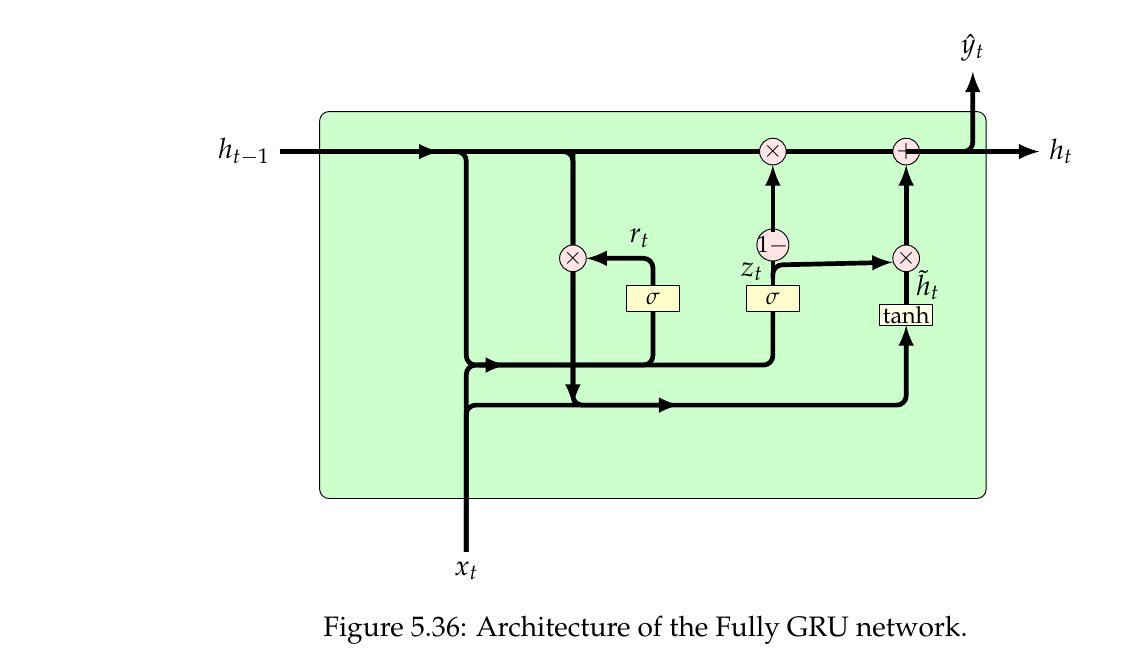

Matematicamente la arquitectura del GRU esta dada por

\begin{eqnarray}
z_t &=& \sigma(W_z x_t + U_z h_{t-1} + b_z) \\
r_t &=& \sigma(W_r x_t + U_r h_{t-1} + b_z) \\
\hot{h}_t &=& \tanh(W_h x_t + U_h r_t \circ h_{t-1} + b_h) \\
h_t &=& (1 - z_t) \circ h_{t-1} + z_t \circ \hot{h}_t.
\end{eqnarray}

Describamos lo que esta envuelto en estas ecuaciones:

$$ x_t :   \text{es el vector de entrada} .$$
$$ h_t :   \text{es el vector oculto y de salida} .$$
$$ \hat{h}_t :   \text{es una variable intermedia para calcular el vector de salida } h_t .$$